**Import the Necessary Libraries**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

**Reading the Dataset**

In [2]:
df = pd.read_csv("data/supplychaindata.csv")
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [3]:
df.shape

(180519, 53)

There are more than 18000 entries each having 53 features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Check for Duplicates

In [8]:
df.duplicated().sum()

0

Handling Missing Values

In [7]:
df.isnull().sum().sort_values(ascending=False).T

Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0


- The entire column "Product Description" contains null values. We can drop this column
- Majority of the "Order Zipcode" values are null. We can drop this column.
- Customer Lname can be imputed with most frequent value but it is not of much importance.
- Customer Zipcode can be imputed with the most frequent value.

As we have large amount of data, We remove all the rows with null values

In [15]:
drop_col = ["Product Description", "Order Zipcode", "Customer Lname", "Product Image", "Customer Email", 
            "Customer Fname", "Customer Password", "Customer Street", "Order Id", "Customer City", 
             "Customer State", "Customer Country", "Customer Id"]

df.drop(columns=drop_col, inplace=True)

In [19]:
df.dropna(inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180516 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180516 non-null  object 
 1   Days for shipping (real)       180516 non-null  int64  
 2   Days for shipment (scheduled)  180516 non-null  int64  
 3   Benefit per order              180516 non-null  float64
 4   Sales per customer             180516 non-null  float64
 5   Delivery Status                180516 non-null  object 
 6   Late_delivery_risk             180516 non-null  int64  
 7   Category Id                    180516 non-null  int64  
 8   Category Name                  180516 non-null  object 
 9   Customer Segment               180516 non-null  object 
 10  Customer Zipcode               180516 non-null  float64
 11  Department Id                  180516 non-null  int64  
 12  Department Name                1805

In [21]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Zipcode,Department Id,Latitude,Longitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,...,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.0
mean,3.497657,2.931845,21.974593,183.107723,0.548295,31.850855,35921.126914,5.443423,29.719830,-84.915074,...,141.231298,0.120644,2.127656,203.771883,183.107723,21.974593,692.498759,31.850855,141.231298,0.0
std,1.623731,1.374449,104.434300,120.043872,0.497664,15.639498,37542.461122,1.629199,9.813676,21.432911,...,139.732278,0.466799,1.453456,132.273070,120.043872,104.434300,336.438773,15.639498,139.732278,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,603.000000,2.000000,-33.937553,-158.025986,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,725.000000,4.000000,18.265432,-98.446312,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,19380.000000,5.000000,33.144863,-76.840759,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,78207.000000,7.000000,39.279617,-66.370583,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,99205.000000,12.000000,48.781933,115.263077,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


EDA Analysis

In [27]:
numerical_cols = list(df.select_dtypes(exclude=["object"]).columns)
categotical_cols = list(df.select_dtypes(include = ["object"]).columns)

In [30]:
print("Numerical Columns: ")
print(numerical_cols)

print("Categorical Columns: ")
print(categotical_cols)


Numerical Columns: 
['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']
Categorical Columns: 
['Type', 'Delivery Status', 'Category Name', 'Customer Segment', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode']


In [31]:
df[categotical_cols].nunique()

Type                              4
Delivery Status                   4
Category Name                    50
Customer Segment                  3
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65749
Order Region                     23
Order State                    1089
Order Status                      9
Product Name                    118
shipping date (DateOrders)    63699
Shipping Mode                     4
dtype: int64

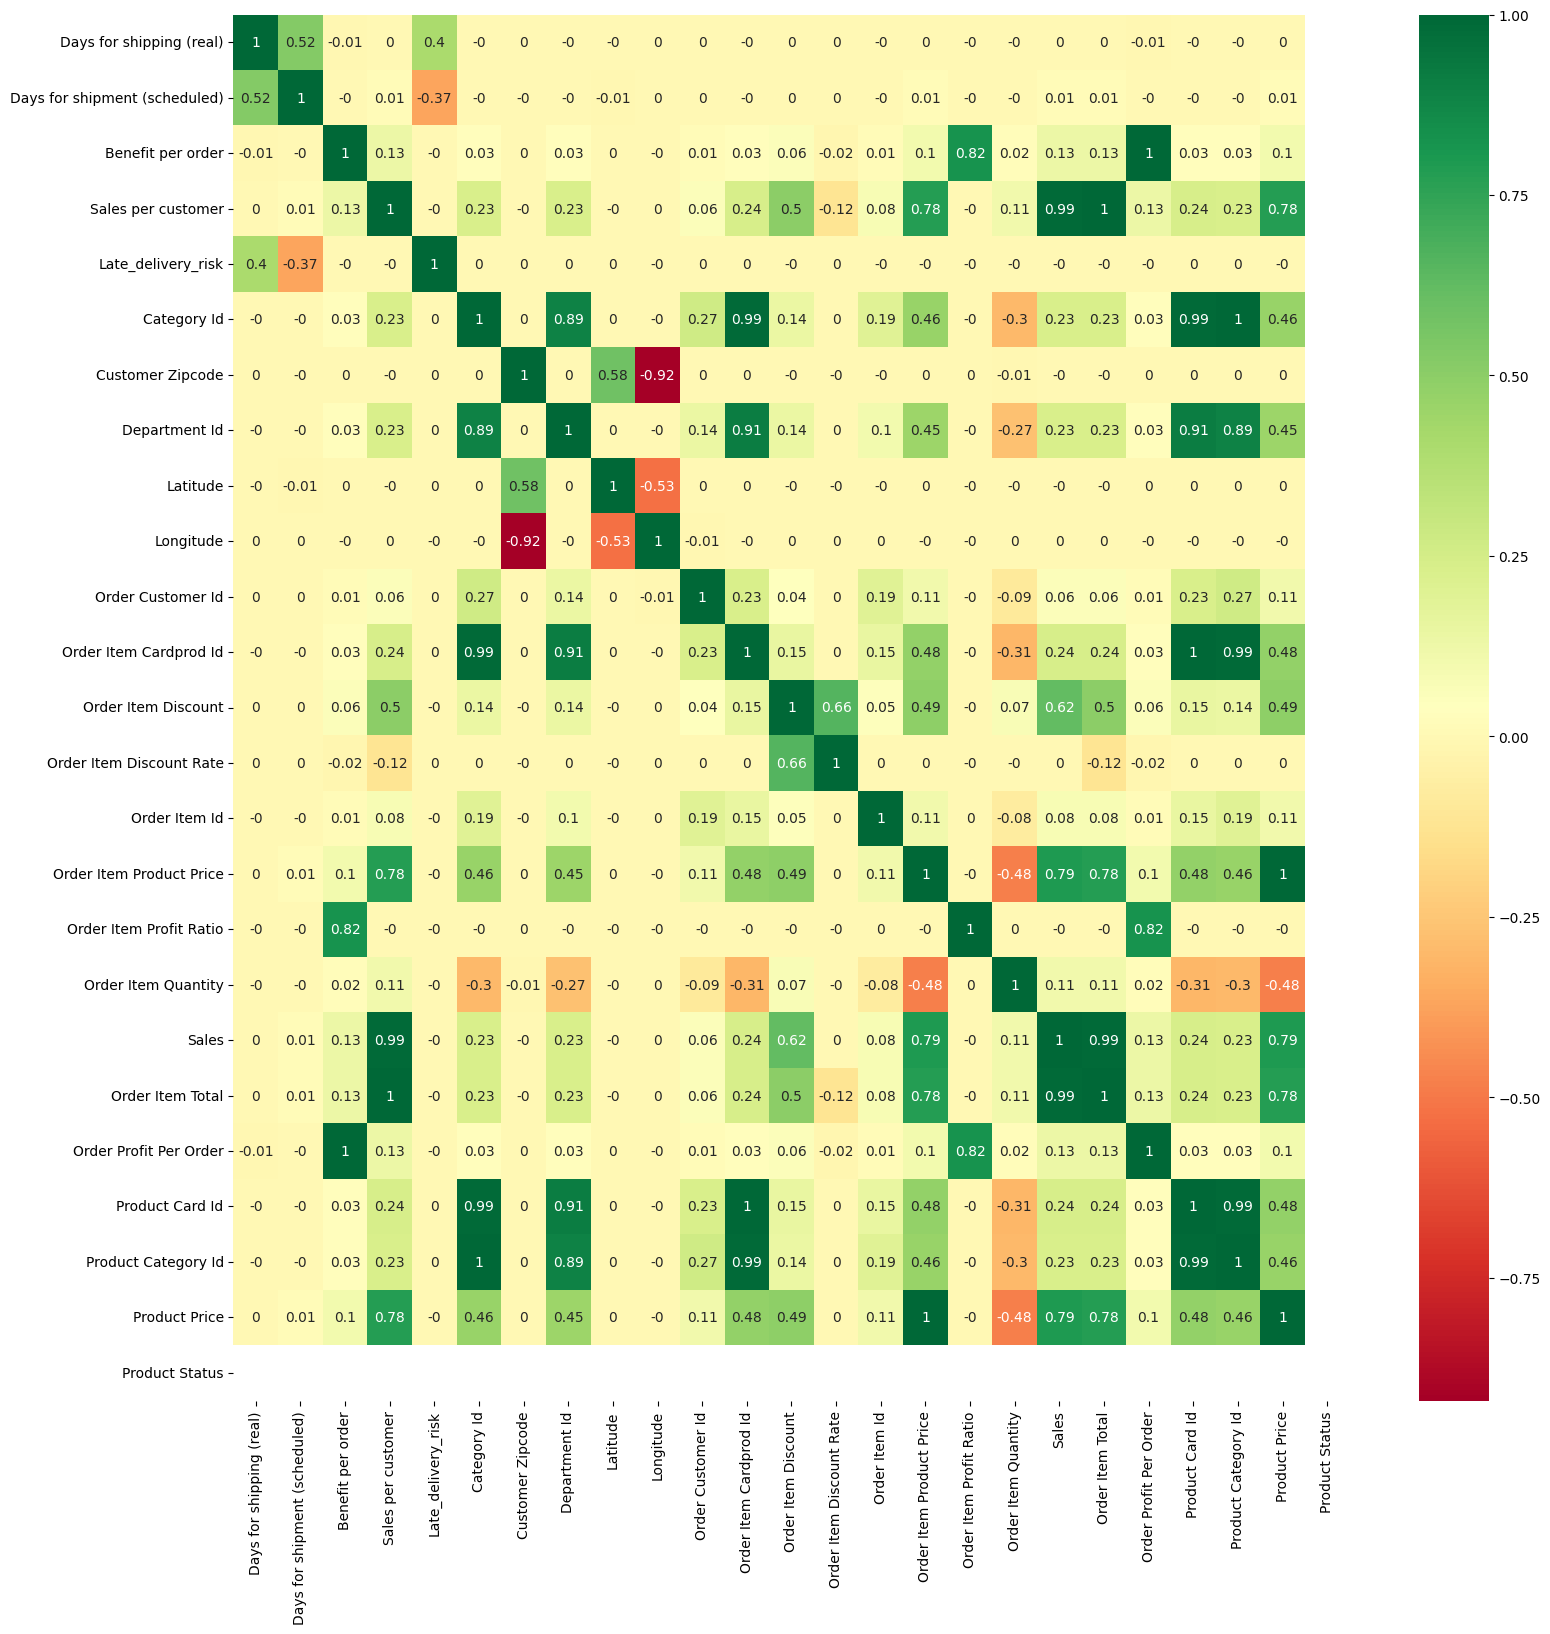

In [41]:
plt.figure(figsize=(18,18))
pearson_corr = df[numerical_cols].corr().round(2)

sns.heatmap(pearson_corr, annot = True, cmap="RdYlGn")
plt.show()

This heatmap demonstrates the correlations between all the numerical columns. Using this plot, We can get rid of highly correlated features in our dataset.
- Benefit per Order and Order Profit per order has correlation of 1.
- Sales Per Customer, Sales, Order Item Total has correlations close to 1.
- Product Price, Order Item Product Price
- Category Id, Product Category id, Order Item Product Id, Product Card Id, Order Item CardProd Id

NON CORRELATED FEATURES:
- Product Status

In [43]:
unwanted_cols = ["Order Profit Per Order", "Sales per customer", "Order Item Total", "Order Item Product Price",
                 "Product Status", "Order Item Cardprod Id", "Product Category Id", "Product Card Id", 
                 "Department Id"
                 ]

df.drop(columns=unwanted_cols, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180516 entries, 0 to 180518
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180516 non-null  object 
 1   Days for shipping (real)       180516 non-null  int64  
 2   Days for shipment (scheduled)  180516 non-null  int64  
 3   Benefit per order              180516 non-null  float64
 4   Delivery Status                180516 non-null  object 
 5   Late_delivery_risk             180516 non-null  int64  
 6   Category Id                    180516 non-null  int64  
 7   Category Name                  180516 non-null  object 
 8   Customer Segment               180516 non-null  object 
 9   Customer Zipcode               180516 non-null  float64
 10  Department Name                180516 non-null  object 
 11  Latitude                       180516 non-null  float64
 12  Longitude                      1805

In [45]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [46]:
df['order_year'] = pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).day
df['shipping_year'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).month
df['shipping_day'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).day

In [54]:
df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98976
Advance shipping     41592
Shipping on time     32194
Shipping canceled     7754
Name: count, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180516 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180516 non-null  object        
 1   Days for shipping (real)       180516 non-null  int64         
 2   Days for shipment (scheduled)  180516 non-null  int64         
 3   Benefit per order              180516 non-null  float64       
 4   Delivery Status                180516 non-null  object        
 5   Late_delivery_risk             180516 non-null  int64         
 6   Category Id                    180516 non-null  int64         
 7   Category Name                  180516 non-null  object        
 8   Customer Segment               180516 non-null  object        
 9   Customer Zipcode               180516 non-null  float64       
 10  Department Name                180516 non-null  object        
 11  Latit

In [ ]:
plt.figure(figsize=(10,10))
x = 1
for i in numerical_cols: 
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()